In [1]:
from sklearn.datasets import fetch_olivetti_faces

In [2]:
olt_faces = fetch_olivetti_faces(data_home='face_data', shuffle=True)
print(olt_faces.data.shape)
print(olt_faces.target.shape)
print(olt_faces.images.shape)

(400, 4096)
(400,)
(400, 64, 64)


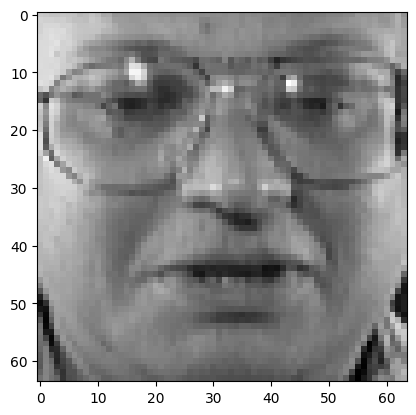

In [3]:
import matplotlib.pyplot as plt

face = olt_faces.images[1]
plt.imshow(face, cmap='gray')
plt.show()

In [4]:
# 转换成tensor
import torch
import torch.nn as nn

data_tensor = torch.tensor(olt_faces.data)
target_tensor = torch.tensor(olt_faces.target)

# dataset拼接
dataset = [(img, lbl) for img,lbl in zip(data_tensor, target_tensor)]

In [5]:
train_data = fetch_olivetti_faces(data_home='face_data', shuffle=True)

In [6]:
# 定义超参数
LR = 1e-3
BATCH_SIZE = 10
epochs = 10

In [7]:
# 数据封装
from torch.utils.data import DataLoader

train_dl = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [9]:
# 从py文件加载model
import torch_nn_face

model = torch_nn_face.TorchNN_face().to(device)
model_no_bn_drop = torch_nn_face.TorchNN_face_no_bn_drop().to(device)

In [10]:
# 定义损失函数&优化器
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

In [15]:
# 训练数据
def training_data(epochs, model, train_dl):
    loss_his = []
    # 开启训练模式
    model.train()
    for epoch in range(epochs):
        for img,lbl in train_dl:
            img,lbl = img.to(device), lbl.to(device)
            result = model(img)
            loss = loss_fn(result, lbl)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            loss_his.append(loss.item())
            print(f'epoch: {epoch}, loss: {loss.item():.4f}')
    return loss_his


In [12]:
# 测试模型
test_data = fetch_olivetti_faces(data_home='face_data', shuffle=True)
test_data_tensor = torch.tensor(test_data.data)
test_target_tensor = torch.tensor(test_data.target)

# dataset拼接
test_dataset = [(img, lbl) for img,lbl in zip(test_data_tensor, test_target_tensor)]

test_dl = DataLoader(test_dataset, batch_size=BATCH_SIZE)

def test_acc(test_dl, model):
    correct = 0
    total = 0

    # 关闭训练模式
    model.eval()

    with torch.no_grad():
        for data, target in test_dl:
            data,target = data.to(device), target.to(device)
            output = model(data.reshape(-1, 4096))
            _,predict = torch.max(output, 1)
            total += target.size(0)
            correct += (predict == target).sum().item()
    print(f'acc: {correct/total*100}%')
    return correct/total*100

In [18]:
def draw_train_hist(hist, title):
    import matplotlib.pyplot as plt
    plt.plot(hist)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(title)
    plt.show()

epoch: 0, loss: 0.2544
epoch: 0, loss: 0.0687
epoch: 0, loss: 0.1453
epoch: 0, loss: 0.1941
epoch: 0, loss: 0.0398
epoch: 0, loss: 0.0202
epoch: 0, loss: 0.1083
epoch: 0, loss: 0.0047
epoch: 0, loss: 0.0525
epoch: 0, loss: 0.0088
epoch: 0, loss: 0.0199
epoch: 0, loss: 0.0171
epoch: 0, loss: 0.1558
epoch: 0, loss: 0.0730
epoch: 0, loss: 0.0570
epoch: 0, loss: 0.3165
epoch: 0, loss: 0.1153
epoch: 0, loss: 0.0070
epoch: 0, loss: 0.0576
epoch: 0, loss: 0.1914
epoch: 0, loss: 0.0347
epoch: 0, loss: 0.0162
epoch: 0, loss: 1.1195
epoch: 0, loss: 0.0375
epoch: 0, loss: 0.0113
epoch: 0, loss: 0.2544
epoch: 0, loss: 0.0011
epoch: 0, loss: 0.5497
epoch: 0, loss: 0.0050
epoch: 0, loss: 0.0307
epoch: 0, loss: 0.0076
epoch: 0, loss: 0.1201
epoch: 0, loss: 0.0804
epoch: 0, loss: 0.0190
epoch: 0, loss: 0.0487
epoch: 0, loss: 0.0122
epoch: 0, loss: 0.0633
epoch: 0, loss: 0.2319
epoch: 0, loss: 0.0024
epoch: 0, loss: 0.1699
epoch: 1, loss: 0.0213
epoch: 1, loss: 0.2179
epoch: 1, loss: 0.0315
epoch: 1, l

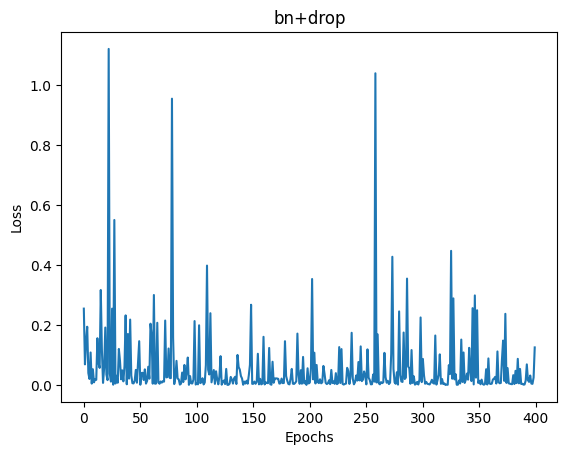

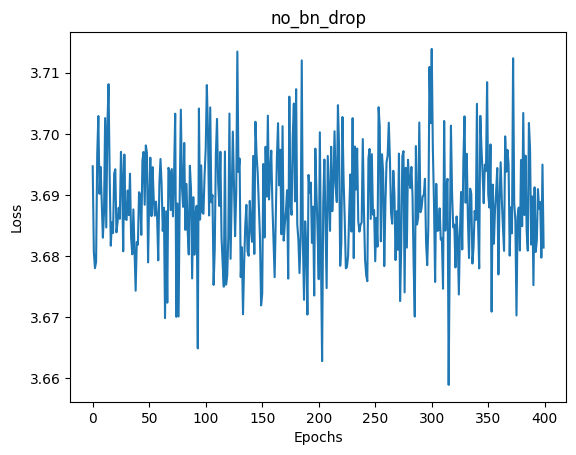

In [19]:
# 绘制
model_hist_1 = training_data(epochs, model, train_dl)
model_hist_2 = training_data(epochs, model_no_bn_drop, train_dl)

draw_train_hist(model_hist_1, "bn+drop")
draw_train_hist(model_hist_2, "no_bn_drop")

In [20]:
optimizerSGD = torch.optim.SGD(model.parameters(), lr=LR)
optimizerRMSprop = torch.optim.RMSprop(model.parameters(), lr=LR)
optimizerAdam = torch.optim.Adam(model.parameters(), lr=LR)
optimizerAdamW = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=1e-4)

optimizer_list = [optimizerSGD, optimizerRMSprop, optimizerAdam, optimizerAdamW]

In [21]:
# 训练数据
def training_data_opt(epochs, model, optimizer, train_dl):
    loss_his = []
    # 开启训练模式
    model.train()
    for epoch in range(epochs):
        for img,lbl in train_dl:
            img,lbl = img.to(device), lbl.to(device)
            result = model(img)
            loss = loss_fn(result, lbl)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            loss_his.append(loss.item())
            print(f'epoch: {epoch}, loss: {loss.item():.4f}')
    return loss_his

epoch: 0, loss: 0.0036
epoch: 0, loss: 0.0026
epoch: 0, loss: 0.2432
epoch: 0, loss: 0.6083
epoch: 0, loss: 0.1939
epoch: 0, loss: 0.2812
epoch: 0, loss: 0.5702
epoch: 0, loss: 0.1567
epoch: 0, loss: 0.1719
epoch: 0, loss: 0.1506
epoch: 0, loss: 0.0113
epoch: 0, loss: 0.0826
epoch: 0, loss: 0.1677
epoch: 0, loss: 0.3211
epoch: 0, loss: 0.1266
epoch: 0, loss: 0.1241
epoch: 0, loss: 0.4619
epoch: 0, loss: 0.0147
epoch: 0, loss: 0.0065
epoch: 0, loss: 0.0820
epoch: 0, loss: 1.0395
epoch: 0, loss: 1.6041
epoch: 0, loss: 0.1286
epoch: 0, loss: 0.3419
epoch: 0, loss: 0.0037
epoch: 0, loss: 0.0053
epoch: 0, loss: 1.5626
epoch: 0, loss: 0.2649
epoch: 0, loss: 0.3490
epoch: 0, loss: 0.0308
epoch: 0, loss: 0.0590
epoch: 0, loss: 1.1625
epoch: 0, loss: 0.2956
epoch: 0, loss: 0.8426
epoch: 0, loss: 0.3034
epoch: 0, loss: 0.0336
epoch: 0, loss: 0.0287
epoch: 0, loss: 1.0397
epoch: 0, loss: 0.0109
epoch: 0, loss: 0.0006
epoch: 1, loss: 0.5191
epoch: 1, loss: 0.1398
epoch: 1, loss: 0.1372
epoch: 1, l

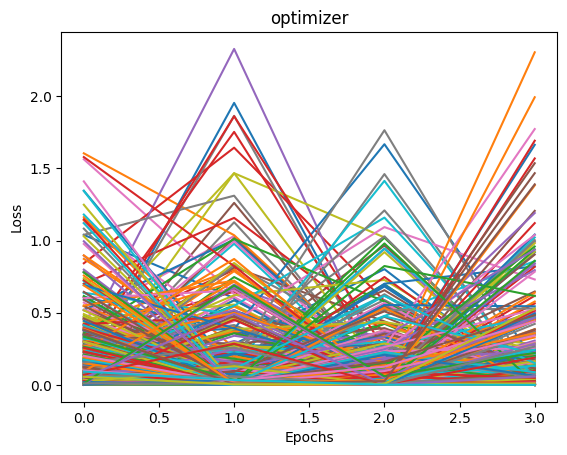

In [ ]:
train_hist = [training_data_opt(epochs, model, optimizer, train_dl) for optimizer in optimizer_list]

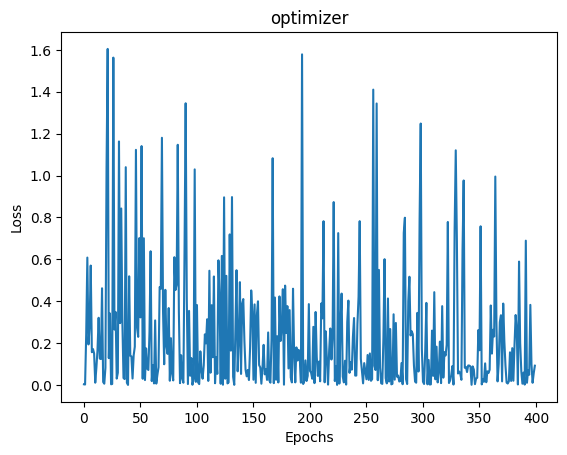

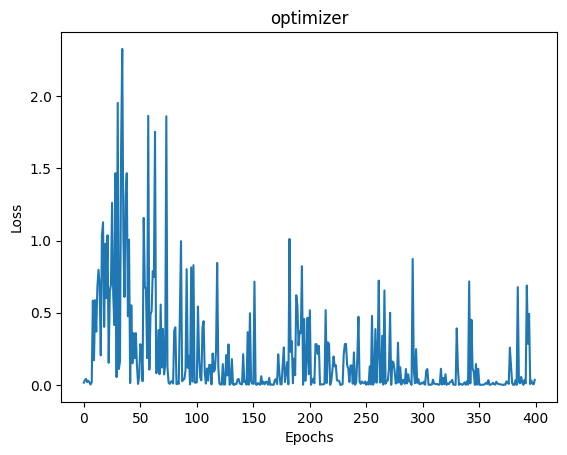

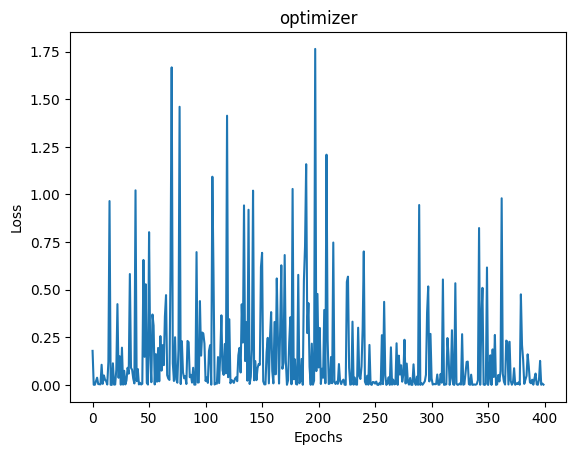

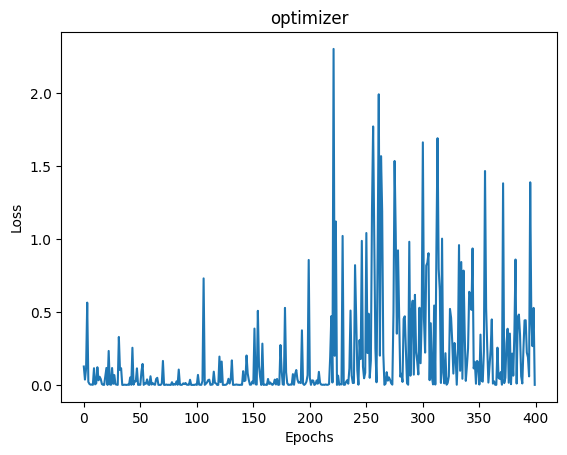

In [31]:
for opt in train_hist:
    draw_train_hist(opt, "optimizer")